In [1]:
import pandas as pd  #Importing necessary library for our analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='http://bit.ly/w-data'
df=pd.read_csv(url) #Reading the Data
df.head() #Checking top 5 rows of our data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.isnull().sum()  #Checking for Null Values

Hours     0
Scores    0
dtype: int64

**Inference:- We can see that ther are no null values present in the data**

In [4]:
df.describe()  #5 Point summary of my data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


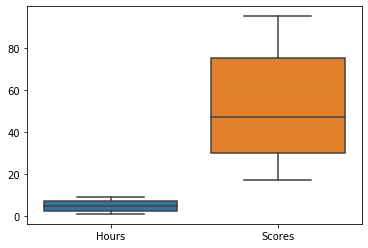

In [5]:
sns.boxplot(data=df) #checking outliers

**Inference:- We can see from boxplot that no outliers are being present in the data**

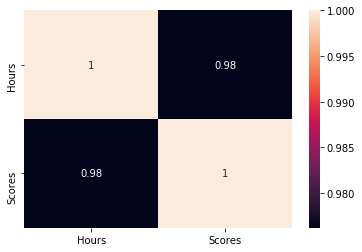

In [6]:
sns.heatmap(df.corr(),annot=True) #checking fo linearity

**Inference:- Heatmap tells that there is 98% positive Correlation among the variables**

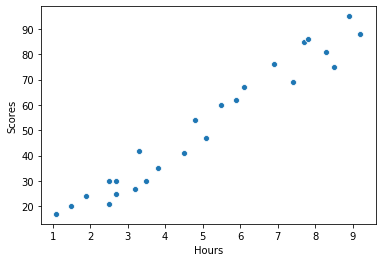

In [7]:
sns.scatterplot(df.Hours,df.Scores) #Linear postive relationship

## Dividing data into dependent and independent variables

In [8]:
x=df.drop('Scores',axis=1)
y=df['Scores']

In [9]:
from sklearn.model_selection import train_test_split  #Importing train test split to divide data 
                                                      #for training phase as well as for testing phase

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) #Dviding data into 80:20 split
                                                                #80% for training and 20% for testing

In [10]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train)  #Training our model

LinearRegression()

In [21]:
y_pred = lr.predict(x_test)

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df # Comparing Actual vs Predicted

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [26]:
# Predicting the score using our developed model if student studies for 9.25 hours 
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = ",hours)
print("Predicted Score = ",own_pred)
#print("Predicted Score = ".format(own_pred[0]))

No of Hours =  9.25
Predicted Score =  [93.69173249]


### **CONCLUSION**- Our model predicts that if student will study for 9.25 hours then he'll be securing 93.69 marks

In [27]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2_SCore:", metrics.r2_score(y_test, y_pred))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665
R2_SCore: 0.9454906892105356
